In [2]:
import pickle
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA

In [30]:
df = pickle.load(open(r"df.save", "rb" ))
order = pickle.load(open(r"order.save", "rb" ))

In [34]:
temp = []
for i, i_key in enumerate(order):
    x = np.array(df[i_key], dtype=np.float64)
    if np.all(np.logical_not(x != 0)):
        temp.append(i_key)
for key in temp:
    order.remove(key)
corr_mat = np.empty((len(order),len(order)),dtype= np.float64)
corr_mat_p = np.empty((len(order),len(order)),dtype= np.float64)

for i,i_key in enumerate(order):
    for j,j_key in enumerate(order):
        if i==j:
            corr_mat[i,j] = 1.0
        elif i<j:
            x = np.array(df[i_key],dtype=np.float64)
            y = np.array(df[j_key],dtype=np.float64)

            xy_remain = np.logical_not(np.logical_or(np.isnan(x),np.isnan(y)))
            x1 = x[xy_remain]
            y1 = y[xy_remain]
            cp,p_value = stats.pearsonr(x1,y1)
            corr_mat[i,j] = cp
            corr_mat_p[i,j] = p_value
            corr_mat[j,i] = cp
            corr_mat_p[j,i] = p_value

total_ = np.sum(corr_mat,axis=0)

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.collections import EllipseCollection
plt.rcParams['figure.figsize'] = [10, 10]
def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

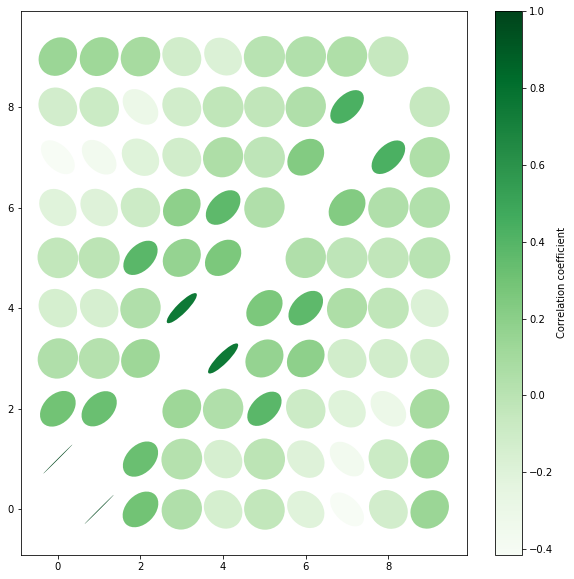

In [69]:

fig, ax = plt.subplots(1, 1)
m = plot_corr_ellipses(corr_mat, ax=ax, cmap='Greens')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)

In [39]:
xy_remain = np.array([True]*count,dtype=np.bool)
for o in order:
    x = np.array(df[o], dtype=np.float64)
    xy_remain = np.logical_and(np.logical_not(np.isnan(x)),xy_remain)
    print(o+":"+str(np.sum(np.logical_not(np.isnan(x)))))

Eco_1:239
Eco_2:239
Eco_3:239
Env_1:239
Env_2:239
Env_4:239
Soc_1:239
Soc_2:239
Soc_3:239
Soc_4:239


In [40]:
np.sum(xy_remain)

239

In [41]:
count

239

In [47]:
order = [u'Eco_1',u'Eco_2']
data_ = np.empty((np.sum(xy_remain), len(order)), dtype=np.float64)
for i,o in enumerate(order):
    data_[:,i] = np.array(df[o],dtype=np.float64)[xy_remain]

In [48]:
data_.shape

(239L, 2L)

In [372]:
# Construct the PCA and put data in the model

In [49]:
pca = PCA(n_components=len(order))
pca.fit(data_)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[0.70137051 0.71279689]
[-0.71279689  0.70137051]


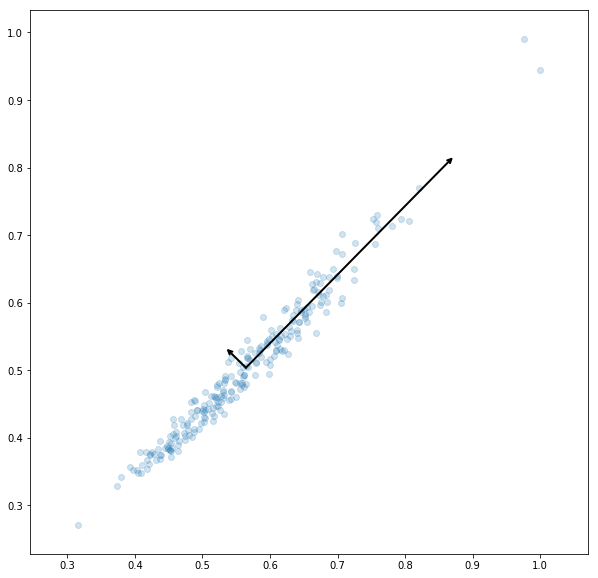

In [70]:
import matplotlib.pyplot as plt
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(data_[:, 0], data_[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    print(vector)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [73]:
data_2 = np.empty((data_.shape[0],2),dtype=np.float64)
data_2[:,0] = data_[:, 0]
data_2[:,1] = data_[:, 1]
data_projected = np.dot(data_2,pca.components_.T)

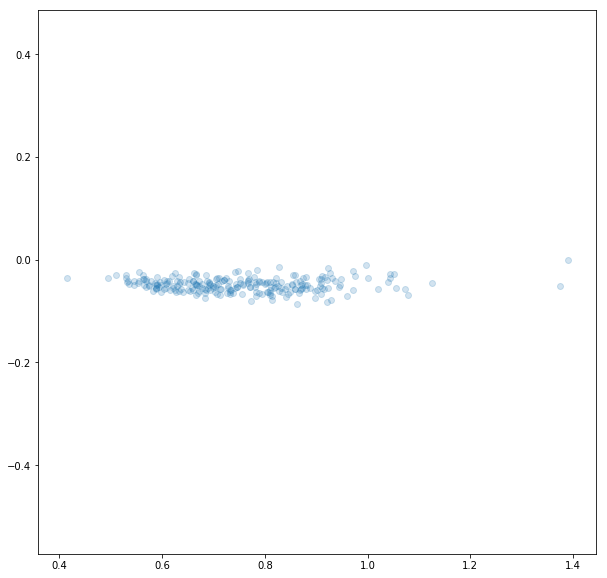

In [74]:
# plot data
plt.scatter(data_projected[:, 0], data_projected[:, 1], alpha=0.2)
plt.axis('equal');

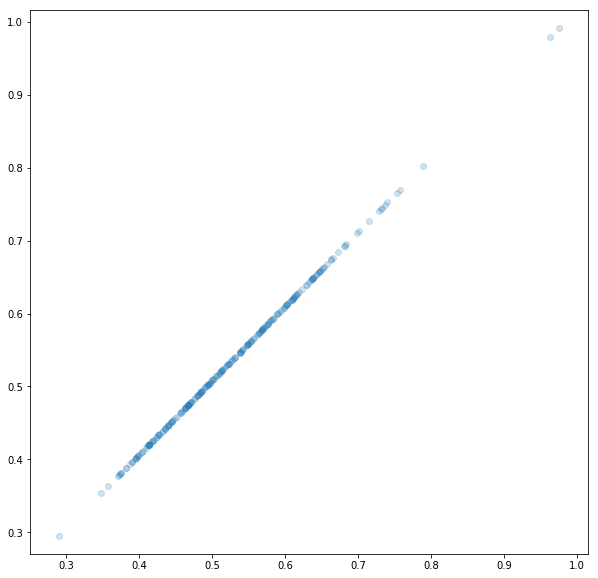

In [75]:
components_reverse = np.linalg.inv(pca.components_.T)
data_projected[:,1] = [0]*data_.shape[0]
data_back = np.dot(data_projected,components_reverse)
# plot data
plt.scatter(data_back[:, 0], data_back[:, 1], alpha=0.2)
plt.axis('equal');